# Imporing Libraries

In [4]:
import pandas as pd
import numpy as np
# some sklearn tools  for  preprocessing and building a pipeline.
# Column transofrmer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
# For Plotting the shap summary graph 
import matplotlib.pyplot as plt

# To interpret thre model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
# from sklearn.svm import SVC 
from catboost import CatBoostClassifier
from sklearn.base import BaseEstimator, TransformerMixin
import pickle

# Loading Dataset

In [5]:
data = pd.read_csv("loan_level_500k.csv")

In [6]:
data

CREDIT_SCORE  FIRST_PAYMENT_DATE FIRST_TIME_HOMEBUYER_FLAG  \
0              669.0              200206                         N   
1              732.0              199904                         N   
2              679.0              200208                         N   
3              721.0              200209                         N   
4              618.0              200210                         N   
...              ...                 ...                       ...   
500132         774.0              200203                       NaN   
500133         689.0              200203                       NaN   
500134         798.0              200203                       NaN   
500135         791.0              200203                       NaN   
500136         773.0              200203                       NaN   

        MATURITY_DATE  METROPOLITAN_STATISTICAL_AREA  \
0              202901                            NaN   
1              202903                        17140.0   
2              202902                        15940.0   
3              202902                        38060.0   
4              202902                        10420.0   
...               ...                            ...   
500132         203202                        33460.0   
500133         203202                        10580.0   
500134         203202                        19780.0   
500135         203202                        42044.0   
500136         203202                            NaN   

        MORTGAGE_INSURANCE_PERCENTAGE  NUMBER_OF_UNITS OCCUPANCY_STATUS  \
0                                 0.0              1.0                O   
1                                 0.0              1.0                O   
2                                30.0              1.0                O   
3                                 0.0              1.0                O   
4                                25.0              1.0                O   
...                               ...              ...              ...   
500132                            0.0              1.0                O   
500133                            0.0              1.0                O   
500134                            0.0              1.0                O   
500135                            0.0              1.0                O   
500136                            0.0              1.0                O   

        ORIGINAL_COMBINED_LOAN_TO_VALUE  ORIGINAL_DEBT_TO_INCOME_RATIO  ...  \
0                                  80.0                           33.0  ...   
1                                  25.0                           10.0  ...   
2                                  91.0                           48.0  ...   
3                                  39.0                           13.0  ...   
4                                  85.0                           24.0  ...   
...                                 ...                            ...  ...   
500132                             61.0                           38.0  ...   
500133                             70.0                           39.0  ...   
500134                             56.0                           41.0  ...   
500135                             26.0                           18.0  ...   
500136                             33.0                           48.0  ...   

        PROPERTY_TYPE  POSTAL_CODE  LOAN_SEQUENCE_NUMBER LOAN_PURPOSE  \
0                  SF      26100.0          F199Q1000004            P   
1                  SF      45200.0          F199Q1000005            N   
2                  SF      44700.0          F199Q1000007            P   
3                  SF      85200.0          F199Q1000013            N   
4                  SF      44200.0          F199Q1000015            N   
...               ...          ...                   ...          ...   
500132             SF      55400.0          F102Q1125986            C   
500133             SF      12300.0          F102Q1125989    

In [7]:
# Drop columns
drop_cols = ['FIRST_PAYMENT_DATE', 'MATURITY_DATE', 'MORTGAGE_INSURANCE_PERCENTAGE', 'ORIGINAL_UPB',
             'ORIGINAL_INTEREST_RATE', 'PREPAYMENT_PENALTY_MORTGAGE_FLAG', 'PROPERTY_STATE',
             'LOAN_SEQUENCE_NUMBER', 'SELLER_NAME', 'SERVICER_NAME']
data.drop(columns=drop_cols, inplace=True)

In [8]:
data.shape

(500137, 17)

In [9]:
data

CREDIT_SCORE FIRST_TIME_HOMEBUYER_FLAG  METROPOLITAN_STATISTICAL_AREA  \
0              669.0                         N                            NaN   
1              732.0                         N                        17140.0   
2              679.0                         N                        15940.0   
3              721.0                         N                        38060.0   
4              618.0                         N                        10420.0   
...              ...                       ...                            ...   
500132         774.0                       NaN                        33460.0   
500133         689.0                       NaN                        10580.0   
500134         798.0                       NaN                        19780.0   
500135         791.0                       NaN                        42044.0   
500136         773.0                       NaN                            NaN   

        NUMBER_OF_UNITS OCCUPANCY_STATUS  ORIGINAL_COMBINED_LOAN_TO_VALUE  \
0                   1.0                O                             80.0   
1                   1.0                O                             25.0   
2                   1.0                O                             91.0   
3                   1.0                O                             39.0   
4                   1.0                O                             85.0   
...                 ...              ...                              ...   
500132              1.0                O                             61.0   
500133              1.0                O                             70.0   
500134              1.0                O                             56.0   
500135              1.0                O                             26.0   
500136              1.0                O                             33.0   

        ORIGINAL_DEBT_TO_INCOME_RATIO  ORIGINAL_LOAN_TO_VALUE CHANNEL  \
0                                33.0                    80.0       R   
1                                10.0                    25.0       R   
2                                48.0                    91.0       R   
3                                13.0                    39.0       T   
4                                24.0                    85.0       R   
...                               ...                     ...     ...   
500132                           38.0                    61.0       R   
500133                           39.0                    70.0       R   
500134                           41.0                    56.0       R   
500135                           18.0                    26.0       R   
500136                           48.0                    33.0       T   

       PRODUCT_TYPE PROPERTY_TYPE  POSTAL_CODE LOAN_PURPOSE  \
0               FRM            SF      26100.0            P   
1               FRM            SF      45200.0            N   
2               FRM            SF      44700.0            P   
3               FRM            SF      85200.0            N   
4               FRM            SF      44200.0            N   
...             ...           ...          ...          ...   
500132          FRM            SF      55400.0            C   
500133          FRM            SF      12300.0            N   
500134          FRM            SF      50300.0            C   
500135          FRM            SF      92600.0            N   
500136          FRM            SF      33000.0            N   

        ORIGINAL_LOAN_TERM  NUMBER_OF_BORROWERS  PREPAID  DELINQUENT  
0                      320                  2.0     True       False  
1                      360                  1.0     True       False  
2                      319                  1.0     True       False  
3                      318                  2.0     True       False  
4                      317                  2.0     True       False  
...                    ...                  ...   

In [10]:
data["NUMBER_OF_BORROWERS"] = data["NUMBER_OF_BORROWERS"].astype("object") 

# Extracting Categorical & Numerical Columns

In [11]:
cat_features= list(data.select_dtypes(include=['object','bool']).columns[:-1])

num_features = list(data.select_dtypes(include=['int64','float64']).columns[:-1])

In [12]:
# numeric_transformer = Pipeline(steps=[
#    ('imputer', KNNImputer(n_neighbors=2, weights="uniform")),
#    ('scaler', StandardScaler())])

# categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent')),
#    ('onehot', OrdinalEncoder())])

# Filling the missing values

In [13]:
#  filling missing values in numerical data 
for i in num_features:
    data[i] = data[i].fillna(data[i].median())

#  filling missing values in categorical data
for i in cat_features:
    data[i] = data[i].fillna(data[i].mode()[0])

In [14]:
replace_dict = {True: 1, 
                False: 0}
data.PREPAID.replace(replace_dict, inplace=True)
data.PREPAID.value_counts(normalize=True)

1    0.961185
0    0.038815
Name: PREPAID, dtype: float64

# Fetching Independent and Dependent Variables

In [15]:
# Get X, y
# X = data.drop("DELINQUENT", axis=1)
# y = data["DELINQUENT"]
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [16]:
# Column Transformer for numerical and categorical features
preprocessor = ColumnTransformer([("numerical", "passthrough", num_features), 
                                  ("categorical", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                   cat_features)])

In [17]:
# preprocessor = ColumnTransformer(
#    remainder = 'passthrough',
#    transformers=[
#        ('numeric', numeric_transformer, num_features),
#        ('categorical', categorical_transformer, cat_features)
# ])

In [18]:
# class ColumnEncodingValues(BaseEstimator, TransformerMixin):

#     def fit(self, *_):
#         return self
    
#     def transform(self, X, *_):
#         X_New = pd.get_dummies(X[cat_features])
#         return X_New
        

# Creating model training pipelines

In [19]:
# Logistic Regression
lr_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", LogisticRegression(class_weight="balanced", solver="liblinear", random_state=42))])

# Decision Tree
dt_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", DecisionTreeClassifier(class_weight="balanced"))])

# Random Forest
rf_model = Pipeline([("preprocessor", preprocessor), 
                     ("model", RandomForestClassifier(class_weight="balanced", n_estimators=100, n_jobs=-1))])

# XGBoost
xgb_model = Pipeline([("preprocessor", preprocessor), 
                      # Add a scale_pos_weight to make it balanced
                      ("model", XGBClassifier(scale_pos_weight=(1 - y.mean()), n_jobs=-1))])

# # Catboost
# catb_model = Pipeline([("preprocessor", preprocessor),
#                       ("model",CatBoostClassifier())])

# Splitting the data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=.3, random_state=42)

In [21]:
# # Main Class
# class Pipeline_Model():
    
# # function to Scale the data
#     def Scaling(self, X):
#         std = StandardScaler(with_mean=False)
#         X = std.fit_transform(X)
# #         X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
#         return X

# # function to resample the data
#     def Over_Sampling(self, X ,y):
#         ros = RandomOverSampler(sampling_strategy = 'minority')
#         X_sampled, y_sampled=ros.fit_resample(X, y)
#         return X_sampled, y_sampled

In [22]:
#  fine tune our logistic regression and evaluate its performance.

# The Eli5 Library: Intepreting models

# With Logistic Regression

In [23]:
# classifier implementation with GridSearchCV
gs = GridSearchCV(lr_model, {"model__C": [1, 1.3, 1.5]}, n_jobs=-1, cv=3, scoring="accuracy",error_score='raise')
gs.fit(X_train, y_train)
pickle.dump(gs,open('gs_LR_model','wb'))

In [24]:
# Best Parameters and Scores
print(gs.best_params_)
print(gs.best_score_)

{'model__C': 1}
0.8822576781207521


In [25]:
lr_model.set_params(**gs.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['CREDIT_SCORE',
                                                   'METROPOLITAN_STATISTICAL_AREA',
                                                   'NUMBER_OF_UNITS',
                                                   'ORIGINAL_COMBINED_LOAN_TO_VALUE',
                                                   'ORIGINAL_DEBT_TO_INCOME_RATIO',
                                                   'ORIGINAL_LOAN_TO_VALUE',
                                                   'POSTAL_CODE']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL', 'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS',
                                                   'PREPAID'])])),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [26]:
lr_model.get_params("model")

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical', 'passthrough',
                                    ['CREDIT_SCORE',
                                     'METROPOLITAN_STATISTICAL_AREA',
                                     'NUMBER_OF_UNITS',
                                     'ORIGINAL_COMBINED_LOAN_TO_VALUE',
                                     'ORIGINAL_DEBT_TO_INCOME_RATIO',
                                     'ORIGINAL_LOAN_TO_VALUE', 'POSTAL_CODE']),
                                   ('categorical',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['FIRST_TIME_HOMEBUYER_FLAG',
                                     'OCCUPANCY_STATUS', 'CHANNEL', 'PRODUCT_TYPE',
                                     'PROPERTY_TYPE', 'LOAN_PURPOSE',
                                     'NUMBER_OF_BORROWERS', 'PREPAID'])])),
  (

In [27]:
# fit the model on the whole training set and calculate accuracy on the test set
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['CREDIT_SCORE',
                                                   'METROPOLITAN_STATISTICAL_AREA',
                                                   'NUMBER_OF_UNITS',
                                                   'ORIGINAL_COMBINED_LOAN_TO_VALUE',
                                                   'ORIGINAL_DEBT_TO_INCOME_RATIO',
                                                   'ORIGINAL_LOAN_TO_VALUE',
                                                   'POSTAL_CODE']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL', 'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS',
                                                   'PREPAID'])])),
                ('model',
                 LogisticRegression(C=1, class_weight='balanced',
                                    random_state=42, solver='liblinear'))])

In [28]:
# Prediction
y_pred = lr_model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.8813932099012276

In [30]:
print(confusion_matrix(y_test,y_pred ))

[[128201  16444]
 [  1352   4045]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.89      0.94    144645
        True       0.20      0.75      0.31      5397

    accuracy                           0.88    150042
   macro avg       0.59      0.82      0.62    150042
weighted avg       0.96      0.88      0.91    150042



In [33]:
# To visualise the weights associated to each feature using eli5
import eli5
eli5.show_weights(lr_model.named_steps["model"])

In [34]:
preprocessor = lr_model.named_steps["preprocessor"]

# Get the list of categories
ohe_categories = preprocessor.named_transformers_["categorical"].categories_

# Create names for our one hot encoded features
new_ohe_features = [f"{col}__{val}" for col, vals in zip(cat_features, ohe_categories) for val in vals]


In [35]:
preprocessor

ColumnTransformer(transformers=[('numerical', 'passthrough',
                                 ['CREDIT_SCORE',
                                  'METROPOLITAN_STATISTICAL_AREA',
                                  'NUMBER_OF_UNITS',
                                  'ORIGINAL_COMBINED_LOAN_TO_VALUE',
                                  'ORIGINAL_DEBT_TO_INCOME_RATIO',
                                  'ORIGINAL_LOAN_TO_VALUE', 'POSTAL_CODE']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['FIRST_TIME_HOMEBUYER_FLAG',
                                  'OCCUPANCY_STATUS', 'CHANNEL', 'PRODUCT_TYPE',
                                  'PROPERTY_TYPE', 'LOAN_PURPOSE',
                                  'NUMBER_OF_BORROWERS', 'PREPAID'])])

In [36]:
ohe_categories

[array(['N', 'Y'], dtype=object),
 array(['I', 'O', 'S'], dtype=object),
 array(['B', 'C', 'R', 'T'], dtype=object),
 array(['FRM'], dtype=object),
 array(['CO', 'CP', 'LH', 'MH', 'PU', 'SF'], dtype=object),
 array(['C', 'N', 'P'], dtype=object),
 array([1., 2.]),
 array([0, 1])]

In [37]:
new_ohe_features

['FIRST_TIME_HOMEBUYER_FLAG__N',
 'FIRST_TIME_HOMEBUYER_FLAG__Y',
 'OCCUPANCY_STATUS__I',
 'OCCUPANCY_STATUS__O',
 'OCCUPANCY_STATUS__S',
 'CHANNEL__B',
 'CHANNEL__C',
 'CHANNEL__R',
 'CHANNEL__T',
 'PRODUCT_TYPE__FRM',
 'PROPERTY_TYPE__CO',
 'PROPERTY_TYPE__CP',
 'PROPERTY_TYPE__LH',
 'PROPERTY_TYPE__MH',
 'PROPERTY_TYPE__PU',
 'PROPERTY_TYPE__SF',
 'LOAN_PURPOSE__C',
 'LOAN_PURPOSE__N',
 'LOAN_PURPOSE__P',
 'NUMBER_OF_BORROWERS__1.0',
 'NUMBER_OF_BORROWERS__2.0',
 'PREPAID__0',
 'PREPAID__1']

In [38]:
# Create a new list with all names of features
all_features = num_features + new_ohe_features

In [39]:
# Made the dataframe to save the data
pd.DataFrame(lr_model.named_steps["preprocessor"].transform(X_train), columns=all_features).head()

CREDIT_SCORE  METROPOLITAN_STATISTICAL_AREA  NUMBER_OF_UNITS  \
0         615.0                        46700.0              1.0   
1         776.0                        35644.0              1.0   
2         711.0                        39300.0              2.0   
3         681.0                        41180.0              1.0   
4         663.0                        38060.0              1.0   

   ORIGINAL_COMBINED_LOAN_TO_VALUE  ORIGINAL_DEBT_TO_INCOME_RATIO  \
0                             77.0                           35.0   
1                             65.0                           25.0   
2                             75.0                           35.0   
3                             75.0                           34.0   
4                             59.0                           18.0   

   ORIGINAL_LOAN_TO_VALUE  POSTAL_CODE  FIRST_TIME_HOMEBUYER_FLAG__N  \
0                    77.0      94500.0                           1.0   
1                    65.0      10500.0                           1.0   
2                    75.0       2700.0                           1.0   
3                    75.0      63000.0                           1.0   
4                    59.0      85200.0                           1.0   

   FIRST_TIME_HOMEBUYER_FLAG__Y  OCCUPANCY_STATUS__I  ...  PROPERTY_TYPE__MH  \
0                           0.0                  0.0  ...                0.0   
1                           0.0                  0.0  ...                0.0   
2                           0.0                  1.0  ...                0.0   
3                           0.0                  0.0  ...                0.0   
4                           0.0                  0.0  ...                0.0   

   PROPERTY_TYPE__PU  PROPERTY_TYPE__SF  LOAN_PURPOSE__C  LOAN_PURPOSE__N  \
0                0.0                1.0              1.0              0.0   
1                0.0                1.0              0.0              0.0   
2                0.0                1.0              1.0              0.0   
3                0.0                1.0              1.0              0.0   
4                0.0                1.0              0.0              1.0   

   LOAN_PURPOSE__P  NUMBER_OF_BORROWERS__1.0  NUMBER_OF_BORROWERS__2.0  \
0              0.0                       0.0                       1.0   
1              1.0                       0.0                       1.0   
2              0.0                       1.0                       0.0   
3              0.0                       1.0                       0.0   
4              0.0                       0.0                       1.0   

   PREPAID__0  PREPAID__1  
0         0.0         1.0  
1         0.0         1.0  
2         0.0         1.0  
3         0.0         1.0  
4         0.0         1.0  

[5 rows x 30 columns]

In [40]:
eli5.show_weights(lr_model.named_steps["model"], feature_names=all_features)

In [41]:
i = 4
X_test.iloc[[i]]

CREDIT_SCORE FIRST_TIME_HOMEBUYER_FLAG  METROPOLITAN_STATISTICAL_AREA  \
389610         727.0                         N                        13380.0   

        NUMBER_OF_UNITS OCCUPANCY_STATUS  ORIGINAL_COMBINED_LOAN_TO_VALUE  \
389610              1.0                O                             80.0   

        ORIGINAL_DEBT_TO_INCOME_RATIO  ORIGINAL_LOAN_TO_VALUE CHANNEL  \
389610                           23.0                    80.0       T   

       PRODUCT_TYPE PROPERTY_TYPE  POSTAL_CODE LOAN_PURPOSE  \
389610          FRM            SF      98200.0            C   

        ORIGINAL_LOAN_TERM  NUMBER_OF_BORROWERS  PREPAID  
389610                 360                  2.0        1

In [42]:
y_test.iloc[i]

False

In [43]:
eli5.show_prediction(lr_model.named_steps["model"], 
                     lr_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

# With a Decision Tree

In [44]:
# classifier implementation with GridSearchCV
gs_1 = GridSearchCV(dt_model, {"model__max_depth": [3, 5, 7], 
                             "model__min_samples_split": [2, 5]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs_1.fit(X_train, y_train)
pickle.dump(gs_1,open('gs_DT_model','wb'))

In [45]:
print(gs_1.best_params_)
print(gs_1.best_score_)

{'model__max_depth': 3, 'model__min_samples_split': 2}
0.8685471086419401


In [46]:
dt_model.set_params(**gs_1.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['CREDIT_SCORE',
                                                   'METROPOLITAN_STATISTICAL_AREA',
                                                   'NUMBER_OF_UNITS',
                                                   'ORIGINAL_COMBINED_LOAN_TO_VALUE',
                                                   'ORIGINAL_DEBT_TO_INCOME_RATIO',
                                                   'ORIGINAL_LOAN_TO_VALUE',
                                                   'POSTAL_CODE']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL', 'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS',
                                                   'PREPAID'])])),
                ('model',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=3))])

In [47]:
# Predictions
dt_model.fit(X_train, y_train)
y_pred_1 = dt_model.predict(X_test)

In [48]:
accuracy_score(y_test, y_pred_1)

0.8733621252715906

In [49]:
print(confusion_matrix(y_test,y_pred_1 ))

[[127034  17611]
 [  1390   4007]]


In [50]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

       False       0.99      0.88      0.93    144645
        True       0.19      0.74      0.30      5397

    accuracy                           0.87    150042
   macro avg       0.59      0.81      0.61    150042
weighted avg       0.96      0.87      0.91    150042



In [51]:
eli5.show_weights(dt_model.named_steps["model"], feature_names=all_features)

In [52]:
eli5.show_prediction(dt_model.named_steps["model"], 
                     dt_model.named_steps["preprocessor"].transform(X_test)[i],
                     feature_names=all_features, show_feature_values=True)

#  LIME(Local Interpretable Model-agnostic Explanation) to generate local intepretations of black box models

# with a Random Forest

In [53]:
# classifier implementation with GridSearchCV
gs_2 = GridSearchCV(rf_model, {"model__max_depth": [10, 15], 
                             "model__min_samples_split": [5, 10]}, 
                  n_jobs=-1, cv=5, scoring="accuracy")

gs_2.fit(X_train, y_train)
pickle.dump(gs_2,open('gs_RF_model','wb'))

/home/vedant/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [54]:
# Best Parameters and Scores
print(gs_2.best_params_)
print(gs_2.best_score_)

{'model__max_depth': 15, 'model__min_samples_split': 5}
0.941401619560405


In [55]:
rf_model.set_params(**gs_2.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['CREDIT_SCORE',
                                                   'METROPOLITAN_STATISTICAL_AREA',
                                                   'NUMBER_OF_UNITS',
                                                   'ORIGINAL_COMBINED_LOAN_TO_VALUE',
                                                   'ORIGINAL_DEBT_TO_INCOME_RATIO',
                                                   'ORIGINAL_LOAN_TO_VALUE',
                                                   'POSTAL_CODE']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['FIRST_TIME_HOMEBUYER_FLAG',
                                                   'OCCUPANCY_STATUS',
                                                   'CHANNEL', 'PRODUCT_TYPE',
                                                   'PROPERTY_TYPE',
                                                   'LOAN_PURPOSE',
                                                   'NUMBER_OF_BORROWERS',
                                                   'PREPAID'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_split=5, n_jobs=-1))])

In [56]:
# Predictions
rf_model.fit(X_train, y_train)
y_pred_2 = rf_model.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred_2)

0.9379040535316778

In [58]:
print(confusion_matrix(y_test,y_pred_2 ))

[[137179   7466]
 [  1851   3546]]


In [59]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

       False       0.99      0.95      0.97    144645
        True       0.32      0.66      0.43      5397

    accuracy                           0.94    150042
   macro avg       0.65      0.80      0.70    150042
weighted avg       0.96      0.94      0.95    150042



In [60]:
eli5.show_weights(rf_model.named_steps["model"], 
                  feature_names=all_features)

# With XGB Model

In [61]:
# classifier implementation with GridSearchCV
gs_3 = GridSearchCV(xgb_model, {"model__max_depth": [5, 10],
                              "model__min_child_weight": [5, 10],
                              "model__n_estimators": [25]},
                  n_jobs=-1, cv=5, scoring="accuracy")

gs_3.fit(X_train, y_train)
pickle.dump(gs_3,open('gs_XGB_model','wb'))

In [62]:
# Best Parameters and Scores
print(gs_3.best_params_)
print(gs_3.best_score_)
xgb_model.set_params(**gs_3.best_params_)
xgb_model.fit(X_train, y_train)

{'model__max_depth': 5, 'model__min_child_weight': 10, 'model__n_estimators': 25}
0.974538339593539


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  ['CREDIT_SCORE',
                                                   'METROPOLITAN_STATISTICAL_AREA',
                                                   'NUMBER_OF_UNITS',
                                                   'ORIGINAL_COMBINED_LOAN_TO_VALUE',
                                                   'ORIGINAL_DEBT_TO_INCOME_RATIO',
                                                   'ORIGINAL_LOAN_TO_VALUE',
                                                   'POSTAL_CODE']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['FIRST_TIME_HOMEBU...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=5, max_leaves=0,
                               min_child_weight=10, missing=nan,
                               monotone_constraints='()', n_estimators=25,
                               n_jobs=-1, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [63]:
# Predictions
y_pred_3 = xgb_model.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred_3)

0.9741072499700084

In [65]:
print(confusion_matrix(y_test,y_pred_3))

[[143617   1028]
 [  2857   2540]]


In [66]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

       False       0.98      0.99      0.99    144645
        True       0.71      0.47      0.57      5397

    accuracy                           0.97    150042
   macro avg       0.85      0.73      0.78    150042
weighted avg       0.97      0.97      0.97    150042



In [67]:
eli5.show_weights(xgb_model.named_steps["model"], 
                  feature_names=all_features)

# Create an explainer

# By using LimeTabularExplainer library 

In [68]:
# Lime can compute statistics on each feature, either mean and std for numerical features, or frequency of values for categorical features. Those statistics are used to scale the data and generate new perturbated data to train our local linear models on.

In [70]:
import lime
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer

In [71]:
categorical_names = {}

# List of all possible values per feature
cat_values = preprocessor.named_transformers_["categorical"].categories_

for col, val in zip(cat_features, cat_values):
    
    categorical_names[data.columns.get_loc(col)] = list(val)

In [72]:
categorical_names

{1: ['N', 'Y'],
 4: ['I', 'O', 'S'],
 8: ['B', 'C', 'R', 'T'],
 9: ['FRM'],
 10: ['CO', 'CP', 'LH', 'MH', 'PU', 'SF'],
 12: ['C', 'N', 'P'],
 14: [1.0, 2.0],
 15: [0, 1]}

In [73]:
def convert_to_lime_format(X, categorical_names, col_names=None, invert=False):
    """Converts data with categorical values as string into the right format 
    for LIME, with categorical values as integers labels.

    It takes categorical_names, the same dictionary that has to be passed
    to LIME to ensure consistency. 

    col_names and invert allow to rebuild the original dataFrame from
    a numpy array in LIME format to be passed to a Pipeline or sklearn
    OneHotEncoder
    """

    # If the data isn't a dataframe, we need to be able to build it
    if not isinstance(X, pd.DataFrame):
        X_lime = pd.DataFrame(X, columns=col_names)
    else:
        X_lime = X.copy()

    for k, v in categorical_names.items():
        if not invert:
            label_map = {
                str_label: int_label for int_label, str_label in enumerate(v)
            }
        else:
            label_map = {
                int_label: str_label for int_label, str_label in enumerate(v)
            }

        X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)

    return X_lime

In [74]:
convert_to_lime_format(X_train, categorical_names).head()

/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)
/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)
/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `

CREDIT_SCORE  FIRST_TIME_HOMEBUYER_FLAG  \
376342         615.0                          0   
292921         776.0                          0   
225452         711.0                          0   
19706          681.0                          0   
337236         663.0                          0   

        METROPOLITAN_STATISTICAL_AREA  NUMBER_OF_UNITS  OCCUPANCY_STATUS  \
376342                        46700.0              1.0                 1   
292921                        35644.0              1.0                 1   
225452                        39300.0              2.0                 0   
19706                         41180.0              1.0                 1   
337236                        38060.0              1.0                 1   

        ORIGINAL_COMBINED_LOAN_TO_VALUE  ORIGINAL_DEBT_TO_INCOME_RATIO  \
376342                             77.0                           35.0   
292921                             65.0                           25.0   
225452                             75.0                           35.0   
19706                              75.0                           34.0   
337236                             59.0                           18.0   

        ORIGINAL_LOAN_TO_VALUE  CHANNEL  PRODUCT_TYPE  PROPERTY_TYPE  \
376342                    77.0        3             0              5   
292921                    65.0        3             0              5   
225452                    75.0        2             0              5   
19706                     75.0        3             0              5   
337236                    59.0        3             0              5   

        POSTAL_CODE  LOAN_PURPOSE  ORIGINAL_LOAN_TERM  NUMBER_OF_BORROWERS  \
376342      94500.0             0                 360                    1   
292921      10500.0             2                 360                    1   
225452       2700.0             0                 360                    0   
19706       63000.0             0                 360                    0   
337236      85200.0             1                 360                    1   

        PREPAID  
376342        1  
292921        1  
225452        1  
19706         1  
337236        1

In [75]:
explainer = LimeTabularExplainer(convert_to_lime_format(X_train, categorical_names).values,
                                 mode="classification",
                                 feature_names=X_train.columns,
                                 categorical_names=categorical_names,
                                 categorical_features=categorical_names.keys(),
                                 random_state=42)

/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)
/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)
/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `

# Explaination on new observations

In [76]:
i = 4
print(X_test.iloc[i])
X_observation = X_test.iloc[[i], :]
X_observation

CREDIT_SCORE                         727.0
FIRST_TIME_HOMEBUYER_FLAG                N
METROPOLITAN_STATISTICAL_AREA      13380.0
NUMBER_OF_UNITS                        1.0
OCCUPANCY_STATUS                         O
ORIGINAL_COMBINED_LOAN_TO_VALUE       80.0
ORIGINAL_DEBT_TO_INCOME_RATIO         23.0
ORIGINAL_LOAN_TO_VALUE                80.0
CHANNEL                                  T
PRODUCT_TYPE                           FRM
PROPERTY_TYPE                           SF
POSTAL_CODE                        98200.0
LOAN_PURPOSE                             C
ORIGINAL_LOAN_TERM                     360
NUMBER_OF_BORROWERS                    2.0
PREPAID                                  1
Name: 389610, dtype: object


CREDIT_SCORE FIRST_TIME_HOMEBUYER_FLAG  METROPOLITAN_STATISTICAL_AREA  \
389610         727.0                         N                        13380.0   

        NUMBER_OF_UNITS OCCUPANCY_STATUS  ORIGINAL_COMBINED_LOAN_TO_VALUE  \
389610              1.0                O                             80.0   

        ORIGINAL_DEBT_TO_INCOME_RATIO  ORIGINAL_LOAN_TO_VALUE CHANNEL  \
389610                           23.0                    80.0       T   

       PRODUCT_TYPE PROPERTY_TYPE  POSTAL_CODE LOAN_PURPOSE  \
389610          FRM            SF      98200.0            C   

        ORIGINAL_LOAN_TERM  NUMBER_OF_BORROWERS  PREPAID  
389610                 360                  2.0        1

# Check the predicted proba with each of our models, on this specific observations

In [77]:
print(f"""\
* True label: {y_test.iloc[i]}
* LR: {lr_model.predict_proba(X_observation)[0]}
* DT: {dt_model.predict_proba(X_observation)[0]}
* RF: {rf_model.predict_proba(X_observation)[0]}
* XGB: {xgb_model.predict_proba(X_observation)[0]}""")

* True label: False
* LR: [0.8398986 0.1601014]
* DT: [0.76067901 0.23932099]
* RF: [0.9033745 0.0966255]
* XGB: [0.99588996 0.00411003]


In [78]:
observation = convert_to_lime_format(X_test.iloc[[i], :],categorical_names).values[0]
observation

/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)
/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)
/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `

array([7.270e+02, 0.000e+00, 1.338e+04, 1.000e+00, 1.000e+00, 8.000e+01,
       2.300e+01, 8.000e+01, 3.000e+00, 0.000e+00, 5.000e+00, 9.820e+04,
       0.000e+00, 3.600e+02, 1.000e+00, 1.000e+00])

In [79]:
# Let write a custom predict_proba functions for our models:
from functools import partial

def custom_predict_proba(X, model):
    X_str = convert_to_lime_format(X, categorical_names, col_names=X_train.columns, invert=True)
    return model.predict_proba(X_str)

lr_predict_proba = partial(custom_predict_proba, model=lr_model)
dt_predict_proba = partial(custom_predict_proba, model=dt_model)
rf_predict_proba = partial(custom_predict_proba, model=rf_model)
xgb_predict_proba = partial(custom_predict_proba, model=xgb_model)

In [80]:
explanation = explainer.explain_instance(observation, lr_predict_proba, num_features=17)

/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)


In [81]:
explanation.show_in_notebook(show_table=True, show_all=False)
plt.savefig("shap_summary.svg",dpi=800)
plt.show()

<Figure size 640x480 with 0 Axes>

In [82]:
print(explanation.local_exp)
print(explanation.intercept)
#R2 score
print(explanation.score)

{1: [(15, -0.6359550581384926), (0, -0.13015246452867332), (14, -0.12089288657910309), (4, -0.056173081305073924), (10, 0.05130884150671278), (3, 0.039960770788059125), (12, 0.03532125704863697), (6, -0.02779822368265263), (8, 0.025121726693433467), (5, -0.018450152528499325), (7, 0.00930626297147018), (11, -0.008555642258118104), (2, 0.0006634907004784339), (1, 0.0005613561840648151), (13, 0.0), (9, 0.0)]}
{1: 0.9752648047019999}
0.39183987970533396


In [83]:
explanation.save_to_file("explanation.html")

In [84]:
explanation = explainer.explain_instance(observation, dt_predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)


0.4286742526187408


In [85]:
explanation = explainer.explain_instance(observation, rf_predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)


0.49311167895278674


In [86]:
explanation = explainer.explain_instance(observation, xgb_predict_proba, num_features=5)
explanation.show_in_notebook(show_table=True, show_all=False)
print(explanation.score)

/tmp/ipykernel_14538/2227238059.py:29: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_lime.iloc[:, k] = X_lime.iloc[:, k].map(label_map)


0.7078866530207544


# Now using local interpretation with SHAP

In [87]:
import shap
# Need to load JS vis in the notebook
shap.initjs() 

In [88]:
# SHAP has a generic explainer that works for any model and a TreeExplainer optimised for tree based models.
explainer = shap.TreeExplainer(xgb_model.named_steps["model"])

In [89]:
# shap_values method is used and took only 1000 samples picked at random
observations = xgb_model.named_steps["preprocessor"].transform(X_train.sample(1000, random_state=42))
shap_values = explainer.shap_values(observations)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [90]:
# Using force_plot we can visualize our explanations from shap package and will use expected_value which is the base value 
i = 0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations[i], feature_names=all_features)

In [91]:
# This shows how each feature contributes to shifting the prediction from the base value to the output value of the model either by decreasing or increasing the probability of our class.

In [92]:
# By using force_plot we can visualize whole dataset at once 
shap.force_plot(explainer.expected_value, shap_values,
                features=observations, feature_names=all_features)
# we can see 1000 values where blue values corresponds to the probability decreasing, red increasing and we can visualise the impact of specific features, for example duration only.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


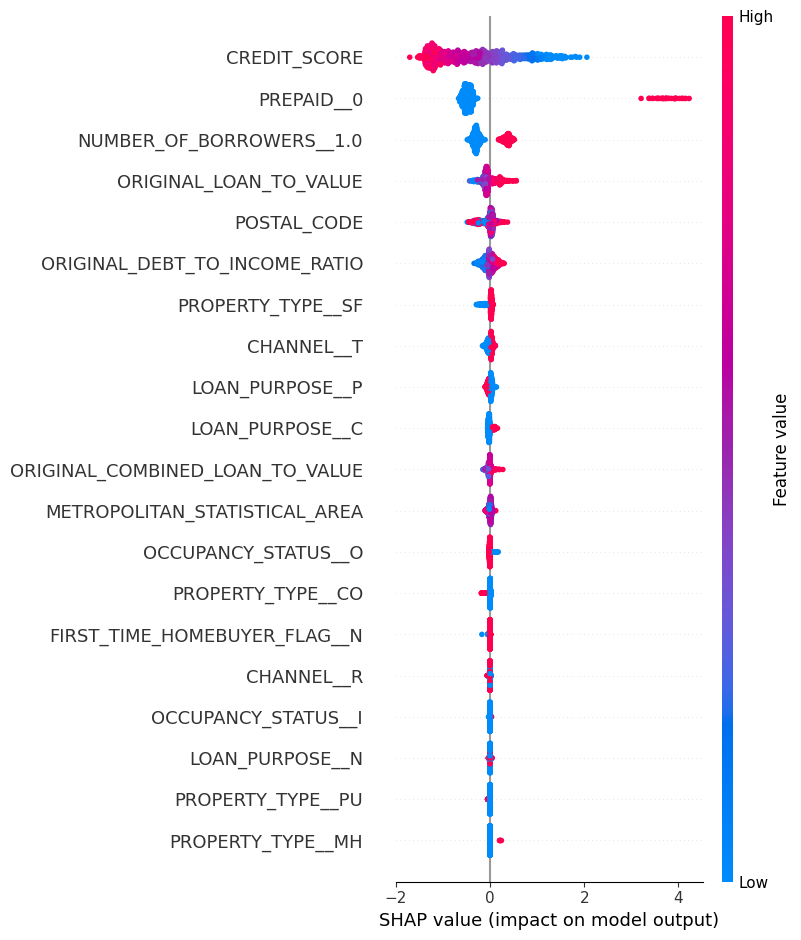

In [93]:
# Here by using summary_plot which is basically feature importance plot with more meaningful insights
shap.summary_plot(shap_values, features=observations, feature_names=all_features)

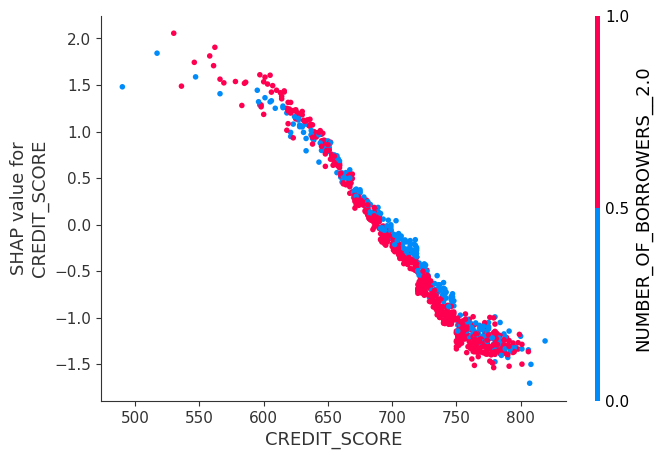

In [94]:
# Here by using dependence_plot not only we can see what features are important but also how they affect our predictions.
shap.dependence_plot("CREDIT_SCORE", shap_values, 
                     pd.DataFrame(observations, columns=all_features))

# Partial Dependence Plots (PDPs)

In [95]:
from sklearn.inspection import PartialDependenceDisplay

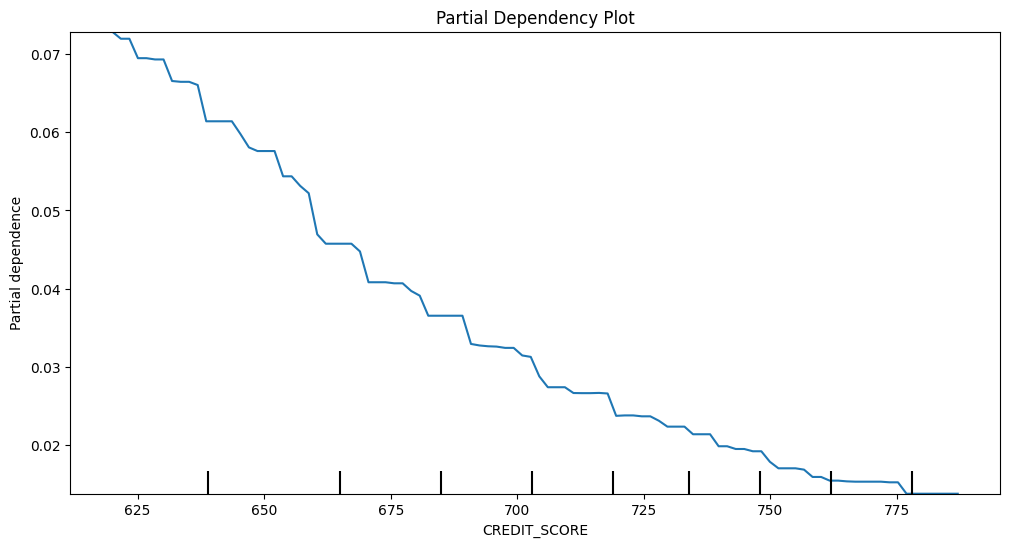

In [96]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(gs_3,
                                        X_test,
                                        features = ['CREDIT_SCORE'],
                                        feature_names = all_features,
                                        ax = ax);

# Individual Conditional Expectations (ICE)

In [97]:
import matplotlib.pyplot as plt

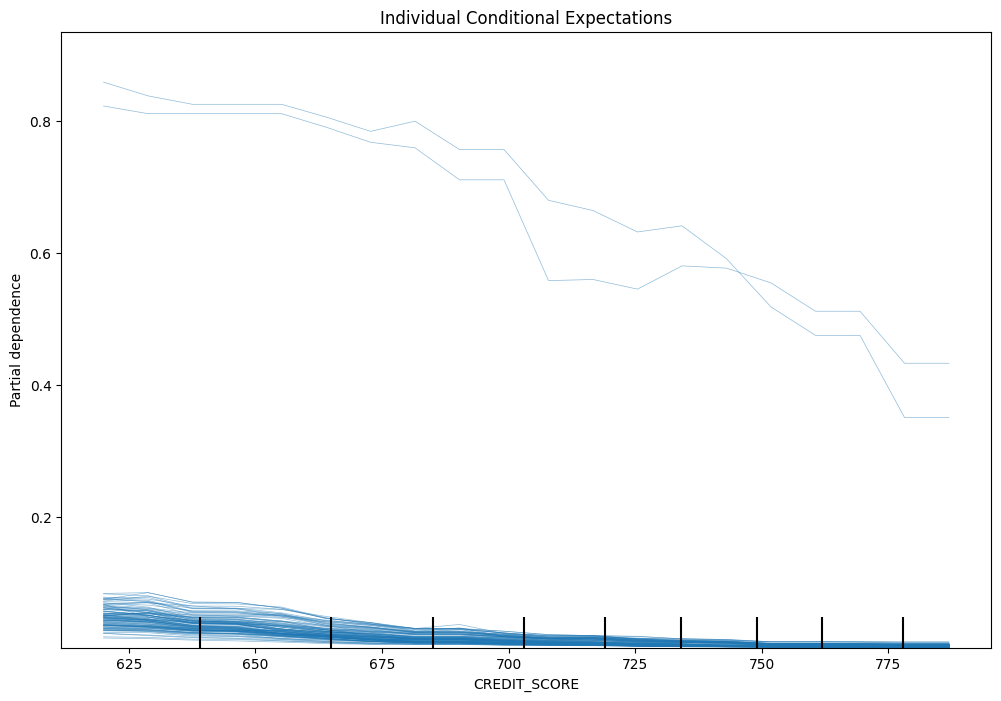

In [98]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    gs_3,
    X_train,
    features=["CREDIT_SCORE"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

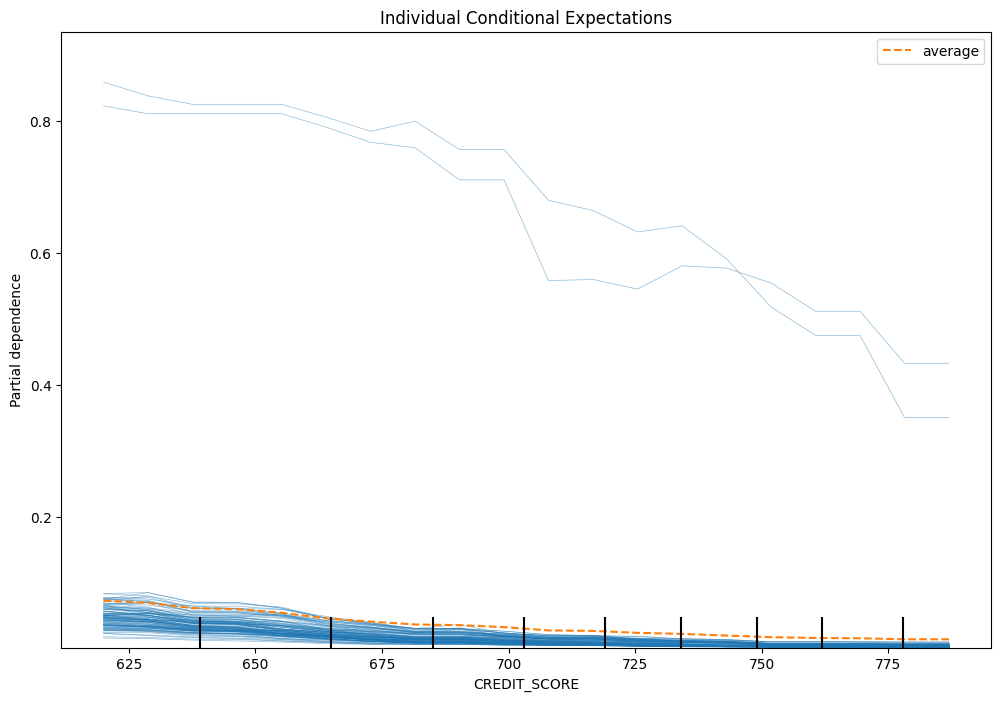

In [99]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    gs_3,
    X_train,
    features=["CREDIT_SCORE"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)

In [24]:
# tn, fp, fn, tp=confusion_matrix(y_test,y_pred_3).ravel()

In [25]:
xgb_cal_new = XGBClassifier()

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [27]:
X_resampled.columns

Index(['PREPAID', 'DELINQUENT', 'FIRST_TIME_HOMEBUYER_FLAG_N',
       'FIRST_TIME_HOMEBUYER_FLAG_Y', 'OCCUPANCY_STATUS_I',
       'OCCUPANCY_STATUS_O', 'OCCUPANCY_STATUS_S', 'CHANNEL_B', 'CHANNEL_C',
       'CHANNEL_R', 'CHANNEL_T', 'PRODUCT_TYPE_FRM', 'PROPERTY_TYPE_CO',
       'PROPERTY_TYPE_CP', 'PROPERTY_TYPE_LH', 'PROPERTY_TYPE_MH',
       'PROPERTY_TYPE_PU', 'PROPERTY_TYPE_SF', 'LOAN_PURPOSE_C',
       'LOAN_PURPOSE_N', 'LOAN_PURPOSE_P', 'CREDIT_SCORE',
       'METROPOLITAN_STATISTICAL_AREA', 'NUMBER_OF_UNITS',
       'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_DEBT_TO_INCOME_RATIO',
       'ORIGINAL_LOAN_TO_VALUE', 'POSTAL_CODE', 'ORIGINAL_LOAN_TERM'],
      dtype='object')

In [28]:
prec=[]
recall=[]
f1=[]
column=[]
cols=['PREPAID', 'FIRST_TIME_HOMEBUYER_FLAG_N','FIRST_TIME_HOMEBUYER_FLAG_Y', 'OCCUPANCY_STATUS_I',
       'OCCUPANCY_STATUS_O', 'OCCUPANCY_STATUS_S', 'CHANNEL_B', 'CHANNEL_C',
       'CHANNEL_R', 'CHANNEL_T', 'PRODUCT_TYPE_FRM', 'PROPERTY_TYPE_CO',
       'PROPERTY_TYPE_CP', 'PROPERTY_TYPE_LH', 'PROPERTY_TYPE_MH',
       'PROPERTY_TYPE_PU', 'PROPERTY_TYPE_SF', 'LOAN_PURPOSE_C',
       'LOAN_PURPOSE_N', 'LOAN_PURPOSE_P', 'CREDIT_SCORE',
       'METROPOLITAN_STATISTICAL_AREA', 'NUMBER_OF_UNITS',
       'ORIGINAL_COMBINED_LOAN_TO_VALUE', 'ORIGINAL_DEBT_TO_INCOME_RATIO',
       'ORIGINAL_LOAN_TO_VALUE', 'POSTAL_CODE', 'ORIGINAL_LOAN_TERM']

for i in cols:
#     Getting the X & Y
    X_new = X_resampled[i]
    y_new = X_resampled['DELINQUENT']
    
#     Splitting the Dataset into training and test dataset 
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new,test_size=.2, random_state=42)
    
#     Implementig the classifier
    xgb_cal_new = XGBClassifier()
# Model training
    xgb_cal_new.fit(X_train_new, y_train_new)
#     Predictions
    y_pred_new = xgb_cal_new.predict(X_test_new)
#     Genrating Confusion Matrix
    True_Negative, False_Positive, False_Negative, True_Positive = confusion_matrix(y_test_new, y_pred_new).ravel()
#     Calculating Precision
    precision = True_Positive / (True_Positive + False_Positive)
#     Calculating Recall
    Recall = True_Positive / (True_Positive + False_Negative)
#     Calculating F1-Score
    F1 = (2 * precision * Recall) / (precision + Recall)
     
    prec.append(precision)
    recall.append(Recall)
    f1.append(F1)
    column.append(i)

C:\Users\vedan\AppData\Local\Temp\ipykernel_18116\3114123651.py:32: RuntimeWarning: invalid value encountered in longlong_scalars
  precision = True_Positive / (True_Positive + False_Positive)


In [29]:
importance=pd.DataFrame({'precision':prec,'recall':recall,'f1-score':f1},column)

In [30]:
importance

precision    recall  f1-score
PREPAID                           0.953981  0.387275  0.550906
FIRST_TIME_HOMEBUYER_FLAG_N       0.654428  0.184277  0.287577
FIRST_TIME_HOMEBUYER_FLAG_Y       0.521334  0.981914  0.681065
OCCUPANCY_STATUS_I                0.507109  0.987964  0.670208
OCCUPANCY_STATUS_O                0.643447  0.122182  0.205368
OCCUPANCY_STATUS_S                0.507261  0.998329  0.672711
CHANNEL_B                         0.500350  0.999974  0.666972
CHANNEL_C                         0.500451  0.999987  0.667064
CHANNEL_R                         0.604492  0.850728  0.706778
CHANNEL_T                         0.559144  0.562121  0.560628
PRODUCT_TYPE_FRM                       NaN  0.000000       NaN
PROPERTY_TYPE_CO                  0.516118  0.992758  0.679154
PROPERTY_TYPE_CP                  0.500457  0.999987  0.667070
PROPERTY_TYPE_LH                  0.500350  0.999961  0.666969
PROPERTY_TYPE_MH                  0.500741  0.998614  0.667016
PROPERTY_TYPE_PU                  0.525705  0.984972  0.685527
PROPERTY_TYPE_SF                  0.537735  0.212313  0.304429
LOAN_PURPOSE_C                    0.540390  0.916321  0.679848
LOAN_PURPOSE_N                    0.562819  0.838395  0.673508
LOAN_PURPOSE_P                    0.587773  0.808649  0.680743
CREDIT_SCORE                      0.922309  0.952791  0.937302
METROPOLITAN_STATISTICAL_AREA     0.604556  0.686545  0.642947
NUMBER_OF_UNITS                   1.000000  0.040524  0.077892
ORIGINAL_COMBINED_LOAN_TO_VALUE   0.999952  0.807302  0.893359
ORIGINAL_DEBT_TO_INCOME_RATIO     1.000000  0.926608  0.961906
ORIGINAL_LOAN_TO_VALUE            0.999952  0.805708  0.892382
POSTAL_CODE                       0.629514  0.711885  0.668170
ORIGINAL_LOAN_TERM                0.501551  0.996994  0.667372

In [1]:
# TN FP FN TP

In [215]:
# precision = tp / (tp+fp)

In [216]:
# precision

In [217]:
# Recall = tp / (tp + fn)

In [218]:
# Recall

In [219]:
# F1 = (2*precision*Recall) / (precision + Recall)

In [220]:
# F1

In [2]:
# feature_name_list = []
# importance_value_list = []
# for i in tqdm(range(len(false_positives))):
#     exp = explainer.explain_instance(data_row=false_positives.iloc[i], predict_fn=clf.predict_proba)
#     feature_name_list.append(false_positives.columns[exp.local_exp[1][0][0]])
#     importance_value_list.append(exp.local_exp[1][0][1])